## Problem Statement

 The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

## Hypothesis Generation

Store Level Hypotheses:

City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.

Population Density: Stores located in densely populated areas should have higher sales because of more demand.

Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place

Competitors: Stores having similar establishments nearby should have less sales because of more competition.

Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.

Product Level Hypotheses:

Brand: Branded products should have higher sales because of higher trust in the customer.

Packaging: Products with good packaging can attract customers and sell more.

Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.

Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.

Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

Advertising: Better advertising of products in the store will should higher sales in most cases.

## Loading Packages and Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [5]:
test_2 = pd.read_csv('Test.csv')

In [6]:
test_2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


## Data Structure and Content

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Exploratory Data Analysis

## Univariate Analysis

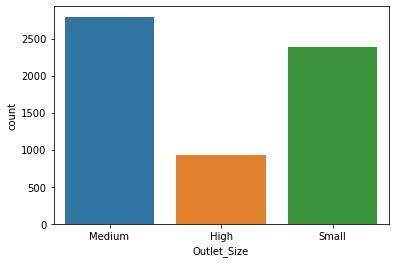

In [10]:
sns.countplot(x=df['Outlet_Size']);

<AxesSubplot:xlabel='Item_MRP'>

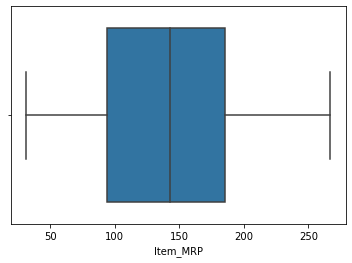

In [11]:
sns.boxplot(x=df['Item_MRP'])

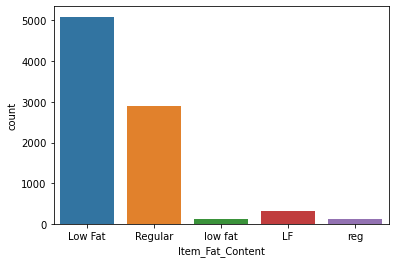

In [12]:
sns.countplot(x=df['Item_Fat_Content']);

C:\Users\sathwik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


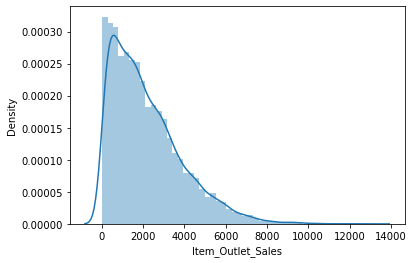

In [13]:
sns.distplot(df['Item_Outlet_Sales']);

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

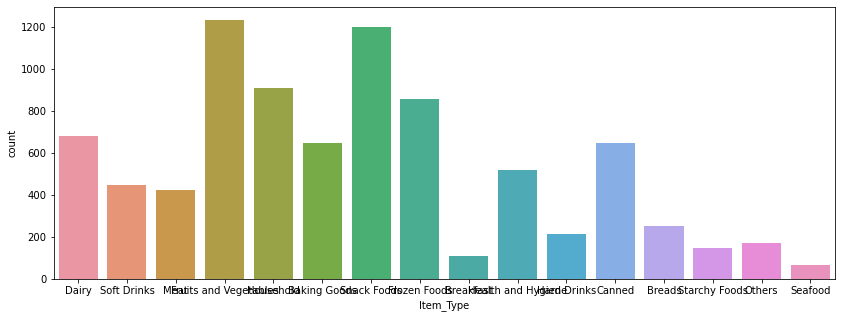

In [14]:
plt.figure(figsize=(14,5))
sns.countplot(x=df['Item_Type'])

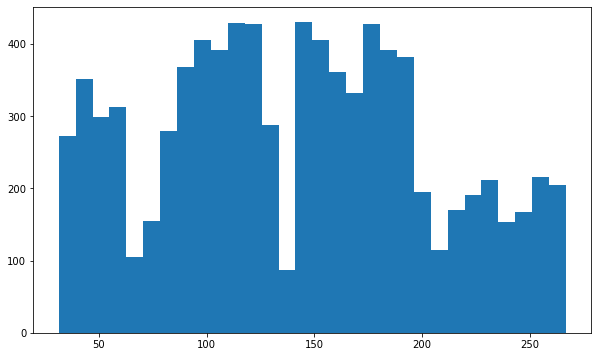

In [15]:
plt.figure(figsize=(10,6))
plt.hist(x='Item_MRP',data=df,bins=30);

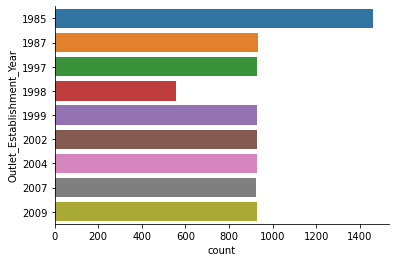

In [16]:
sns.countplot(y=df['Outlet_Establishment_Year'])
sns.despine()

C:\Users\sathwik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

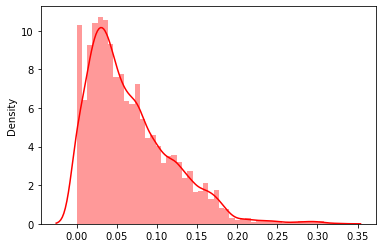

In [17]:
sns.distplot(x=df['Item_Visibility'], kde=True,color = 'red')

C:\Users\sathwik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

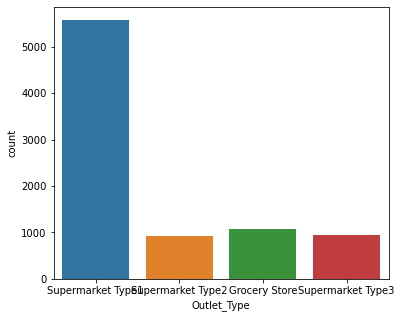

In [18]:
plt.figure(figsize=(6,5))
sns.countplot(df['Outlet_Type'])

## Bivariate Analysis

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

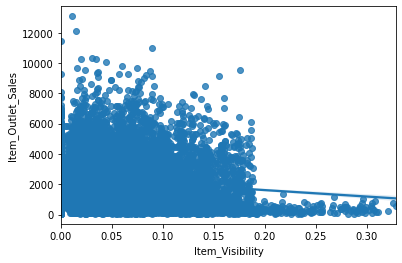

In [19]:
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

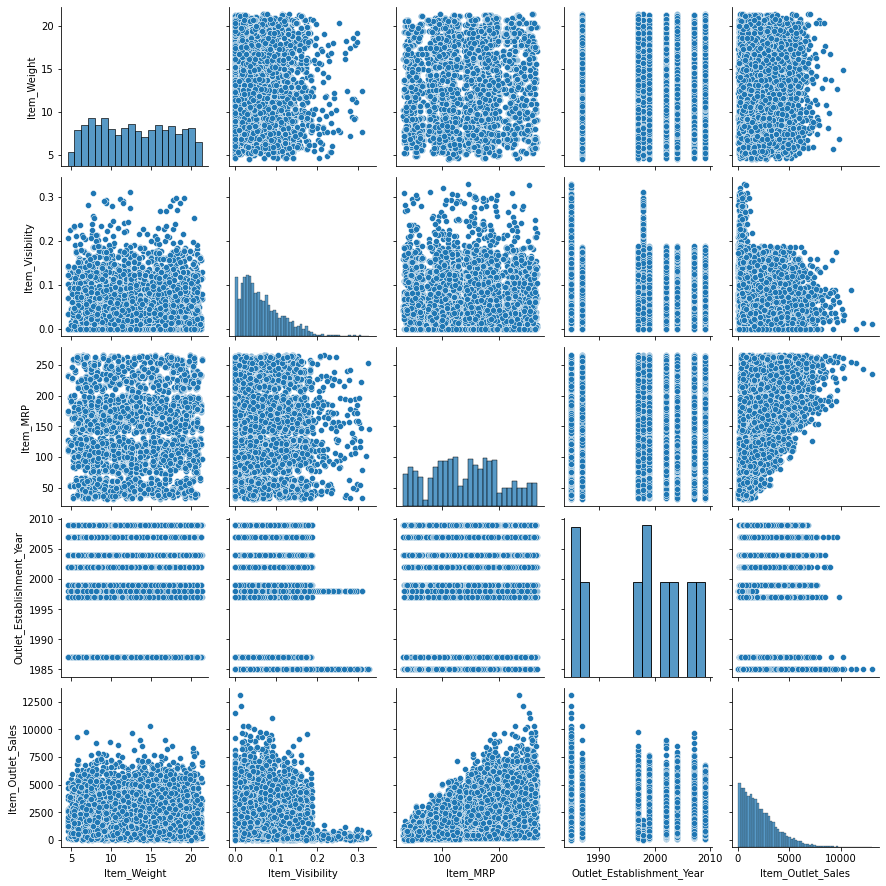

In [20]:
sns.pairplot(df)

<AxesSubplot:>

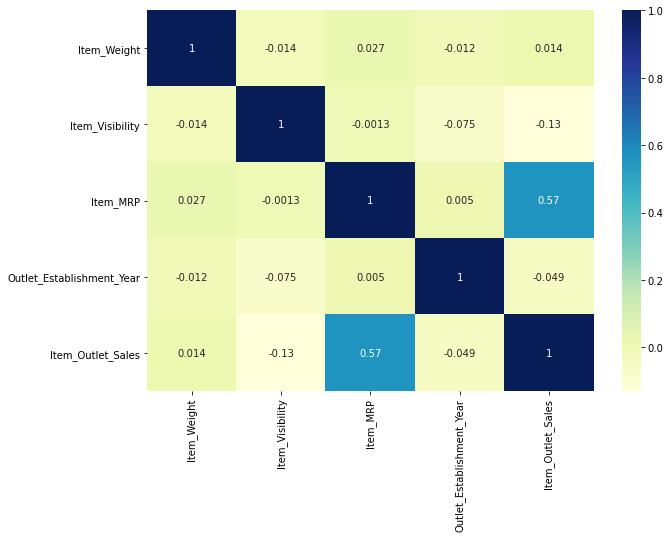

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

## Missing Values Treatment

In [22]:
(df.isnull().sum()).sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
df.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [24]:
df.Item_Weight.nunique()

415

In [25]:
np.mean(df.Item_Weight)

12.857645184136183

In [26]:
df.Item_Weight = df.Item_Weight.fillna(np.mean(df.Item_Weight))

In [27]:
df.Item_Weight.describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

### Outlet Size imputation

In [28]:
df.Outlet_Size

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

Dont impute cuz ull know soon

## Feature Engineering

In [29]:
# Replacing LF with Low Fat, reg Regular, low fat with Low Fat
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [30]:
df['new_col'] = df.Item_Identifier.apply(lambda x: str(x)[:3])

In [31]:
test_2['new_col'] = test_2.Item_Identifier.apply(lambda x: str(x)[:3])

In [32]:
df.new_col.unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

In [33]:
test_2.new_col.unique()

array(['FDW', 'NCN', 'FDQ', 'FDY', 'FDH', 'FDL', 'FDC', 'FDN', 'FDA',
       'FDT', 'NCC', 'FDU', 'DRL', 'FDM', 'FDI', 'DRC', 'NCM', 'NCJ',
       'FDG', 'NCL', 'FDS', 'FDX', 'NCF', 'NCE', 'FDE', 'NCR', 'FDR',
       'FDD', 'NCD', 'NCY', 'FDP', 'NCS', 'FDF', 'DRH', 'FDJ', 'FDV',
       'FDB', 'NCW', 'NCX', 'FDZ', 'DRG', 'NCG', 'DRP', 'NCH', 'NCT',
       'NCU', 'FDK', 'DRB', 'FDO', 'NCO', 'DRI', 'DRF', 'DRN', 'NCB',
       'NCI', 'DRM', 'DRK', 'NCP', 'DRD', 'NCZ', 'NCK', 'DRE', 'NCV',
       'DRZ', 'NCQ', 'NCA', 'DRY', 'DRA', 'DRJ', 'DRO', 'DRQ'],
      dtype=object)

## Encoding Categorical Variables

## One Hot Encoding

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [36]:
df.Outlet_Type.nunique()

4

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  new_col                    8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

In [38]:
df.columns.to_list()

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales',
 'new_col']

In [39]:
cat_cols=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','new_col']

In [40]:
encoder.fit(df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [41]:
encoded_cols = list(encoder.get_feature_names())

In [42]:
encoded_cols

['x0_Low Fat',
 'x0_Regular',
 'x1_Baking Goods',
 'x1_Breads',
 'x1_Breakfast',
 'x1_Canned',
 'x1_Dairy',
 'x1_Frozen Foods',
 'x1_Fruits and Vegetables',
 'x1_Hard Drinks',
 'x1_Health and Hygiene',
 'x1_Household',
 'x1_Meat',
 'x1_Others',
 'x1_Seafood',
 'x1_Snack Foods',
 'x1_Soft Drinks',
 'x1_Starchy Foods',
 'x2_OUT010',
 'x2_OUT013',
 'x2_OUT017',
 'x2_OUT018',
 'x2_OUT019',
 'x2_OUT027',
 'x2_OUT035',
 'x2_OUT045',
 'x2_OUT046',
 'x2_OUT049',
 'x3_High',
 'x3_Medium',
 'x3_Small',
 'x3_nan',
 'x4_Tier 1',
 'x4_Tier 2',
 'x4_Tier 3',
 'x5_Grocery Store',
 'x5_Supermarket Type1',
 'x5_Supermarket Type2',
 'x5_Supermarket Type3',
 'x6_DRA',
 'x6_DRB',
 'x6_DRC',
 'x6_DRD',
 'x6_DRE',
 'x6_DRF',
 'x6_DRG',
 'x6_DRH',
 'x6_DRI',
 'x6_DRJ',
 'x6_DRK',
 'x6_DRL',
 'x6_DRM',
 'x6_DRN',
 'x6_DRO',
 'x6_DRP',
 'x6_DRQ',
 'x6_DRY',
 'x6_DRZ',
 'x6_FDA',
 'x6_FDB',
 'x6_FDC',
 'x6_FDD',
 'x6_FDE',
 'x6_FDF',
 'x6_FDG',
 'x6_FDH',
 'x6_FDI',
 'x6_FDJ',
 'x6_FDK',
 'x6_FDL',
 'x6_FDM',
 

In [43]:
len(encoded_cols)

110

In [44]:
df[encoded_cols] = encoder.transform(df[cat_cols])

In [45]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,x6_NCQ,x6_NCR,x6_NCS,x6_NCT,x6_NCU,x6_NCV,x6_NCW,x6_NCX,x6_NCY,x6_NCZ
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

## XG Boost

In [46]:
len(df.columns)

123

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 123 entries, Item_Identifier to x6_NCZ
dtypes: float64(114), int64(1), object(8)
memory usage: 8.0+ MB


In [48]:
subtract_cols = cat_cols.copy()

In [49]:
subtract_cols.append('Item_Outlet_Sales')

In [50]:
subtract_cols.append('Item_Identifier')

In [51]:
subtract_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'new_col',
 'Item_Outlet_Sales',
 'Item_Identifier']

In [52]:
input_cols = set(df.columns) - set(subtract_cols)

In [53]:
input_cols = list(input_cols)

In [54]:
len(input_cols)

114

## Modeling

## XG Boost

In [55]:
from xgboost import XGBRegressor

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
train_inputs,test_inputs,train_targets,test_targets = train_test_split(df[input_cols],df.Item_Outlet_Sales,test_size=0.2)

In [58]:
xgb = XGBRegressor(n_jobs=-1,max_depth=6,n_estimators=500,learning_rate=0.01,subsample=0.3)

In [59]:
xgb.fit(train_inputs,train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [60]:
from sklearn.metrics import r2_score,mean_squared_error

In [61]:
r2_score(train_targets,xgb.predict(train_inputs))

0.6753146601564692

In [62]:
np.sqrt(mean_squared_error(train_targets,xgb.predict(train_inputs)))

970.4891142501385

In [63]:
np.sqrt(mean_squared_error(test_targets,xgb.predict(test_inputs)))

1082.6361390599855

1146->1130->1111->1098->1082

## Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lreg=LinearRegression()

In [66]:
lreg.fit(train_inputs,train_targets)

LinearRegression()

In [67]:
pred=lreg.predict(train_inputs)

In [68]:
r2_score(train_targets,pred)

0.5668117830276996

In [69]:
np.sqrt(mean_squared_error(train_targets,pred))

1120.9794366838769

In [70]:
np.sqrt(mean_squared_error(test_targets,lreg.predict(test_inputs)))

1142.0268818771638

## Regularized Linear Regression

In [71]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [72]:
ridge = Ridge(alpha=.3)
ridge.fit(train_inputs,train_targets)

Ridge(alpha=0.3)

In [73]:
print(ridge.score(train_inputs, train_targets))
print(ridge.score(test_inputs, test_targets))

0.5668110092920282
0.5586369660446726


In [74]:
np.sqrt(mean_squared_error(train_targets,lreg.predict(train_inputs)))

1120.9794366838769

In [75]:
np.sqrt(mean_squared_error(test_targets,lreg.predict(test_inputs)))

1142.0268818771638

Score and RMSE are same as linear regression

## Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf= RandomForestRegressor(n_jobs=-1,n_estimators=600,max_depth=6,min_samples_leaf=5)

In [78]:
rf.fit(df[input_cols],df.Item_Outlet_Sales)

RandomForestRegressor(max_depth=6, min_samples_leaf=5, n_estimators=600,
                      n_jobs=-1)

In [79]:
r2_score(train_targets,rf.predict(train_inputs))

0.6180679838191196

In [80]:
np.sqrt(mean_squared_error(train_targets,rf.predict(train_inputs)))

1052.5733287106862

In [81]:
np.sqrt(mean_squared_error(test_targets,rf.predict(test_inputs)))

1048.0235191074942

## Summary

We consider RMSE as an important metric

RMSE(Root Mean Squared Error) with Linear Regression is: 1142.02

RMSE(Root Mean Squared Error) with Regularized Linear Regression is: 1142.02

RMSE(Root Mean Squared Error) with Random Forest is: 1048.02

RMSE(Root Mean Squared Error) with XG Boost is: 1089.59

## Predicting Test Data

In [82]:
test_2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,new_col
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,FDW
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,FDW
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NCN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,FDQ
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,FDY
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,FDB
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,FDD
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NCO
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,FDJ


In [83]:
test_2.Item_Weight = test_2.Item_Weight.fillna(np.mean(test_2.Item_Weight))

In [84]:
test_2.Item_Weight.describe()

count    5681.000000
mean       12.695633
std         4.245189
min         4.555000
25%         9.195000
50%        12.695633
75%        15.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [85]:
test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
 11  new_col                    5681 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 532.7+ KB


In [86]:
len(encoded_cols)

110

In [87]:
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'new_col']

In [88]:
(encoder.transform(test_2[cat_cols])).shape

(5681, 110)

In [89]:
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'new_col']

In [90]:
test_2[encoded_cols] = encoder.transform(test_2[cat_cols])

In [91]:
test_2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,x6_NCQ,x6_NCR,x6_NCS,x6_NCT,x6_NCU,x6_NCV,x6_NCW,x6_NCX,x6_NCY,x6_NCZ
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
preds = xgb.predict(test_2[input_cols])

In [93]:
sub = pd.read_csv('sample_submission.csv')

In [94]:
sub

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [95]:
sub.Item_Outlet_Sales = preds

In [96]:
sub

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1613.320068
1,FDW14,OUT017,1299.122314
2,NCN55,OUT010,651.429932
3,FDQ58,OUT017,2561.756348
4,FDY38,OUT027,6049.752930
...,...,...,...
5676,FDB58,OUT046,2253.685303
5677,FDD47,OUT018,2417.066895
5678,NCO17,OUT045,1781.146484
5679,FDJ26,OUT017,3804.770508


In [97]:
sub.Item_Outlet_Sales.describe()

count    5681.000000
mean     2173.691650
std      1306.820312
min       124.990982
25%      1089.969360
50%      2044.794189
75%      3079.895020
max      7015.065430
Name: Item_Outlet_Sales, dtype: float64

In [98]:
sub.to_csv('submission.csv',index=None)

In [99]:
test_2 = pd.read_csv('test.csv')

In [100]:
test_2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


### We choose XG Boost as our final model because it works very fine with hyper parametr tuning

## Final Model

In [101]:
xgb_final = XGBRegressor(n_jobs=-1,max_depth=6,n_estimators=500,learning_rate=0.01,subsample=0.5,colsample_bytree=0.8,min_child_weight=0.5)

In [102]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,x6_NCQ,x6_NCR,x6_NCS,x6_NCT,x6_NCU,x6_NCV,x6_NCW,x6_NCX,x6_NCY,x6_NCZ
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
xgb_final.fit(df[input_cols],df.Item_Outlet_Sales)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=0.5, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [105]:
test_2['new_col'] = test_2.Item_Identifier.apply(lambda x: str(x)[:3])

In [106]:
test_2[encoded_cols]=encoder.transform(test_2[cat_cols])

In [116]:
preds = xgb_final.predict(test_2[input_cols])
preds

array([1567.472 , 1315.8201,  636.6217, ..., 1818.3999, 3652.2068,
       1492.8226], dtype=float32)

In [108]:
sub.Item_Outlet_Sales = preds

In [109]:
sub.to_csv('sub.csv',index=None)


## RF FINAL

In [110]:
rf_final = RandomForestRegressor(n_jobs=-1,n_estimators=600,max_depth=6,min_samples_leaf=5)

In [111]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,x6_NCQ,x6_NCR,x6_NCS,x6_NCT,x6_NCU,x6_NCV,x6_NCW,x6_NCX,x6_NCY,x6_NCZ
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
rf_final.fit(df[input_cols],df.Item_Outlet_Sales)

RandomForestRegressor(max_depth=6, min_samples_leaf=5, n_estimators=600,
                      n_jobs=-1)

In [113]:
test_2.Item_Weight=test_2.Item_Weight.fillna(np.mean(test_2.Item_Weight))

In [114]:
test_2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,x6_NCQ,x6_NCR,x6_NCS,x6_NCT,x6_NCU,x6_NCV,x6_NCW,x6_NCX,x6_NCY,x6_NCZ
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
rf_final.predict(test_2[input_cols])

array([1651.23058744, 1356.58933629,  570.66055635, ..., 1952.73707688,
       3725.25530368, 1308.32160265])

In [117]:
sub.Item_Outlet_Sales = rf_final.predict(test_2[input_cols])

In [118]:
sub.to_csv('rf_sub.csv',index=None)